**Run one time**

In [7]:
!gdown --id 1ksa-d6V_9UG-dPlHgcg6uaItN-3IyARH
!gdown --id 1FQZ1vbdoGK9adddfjy9CpMvl7XGtNpx9
!gdown --id 1pfIacJqSFwPMSHr5lPdVoROkRJ5vio9T
!unzip purified.zip
!unzip totaldataset.zip
!unzip opticalflowTime.zip

Downloading...
From: https://drive.google.com/uc?id=1ksa-d6V_9UG-dPlHgcg6uaItN-3IyARH
To: /content/purified.zip
100% 396k/396k [00:00<00:00, 57.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1FQZ1vbdoGK9adddfjy9CpMvl7XGtNpx9
To: /content/totaldataset.zip
100% 1.33M/1.33M [00:00<00:00, 82.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1pfIacJqSFwPMSHr5lPdVoROkRJ5vio9T
To: /content/opticalflowTime.zip
100% 389k/389k [00:00<00:00, 56.5MB/s]
Archive:  purified.zip
  inflating: purified/1.csv          
  inflating: purified/12.csv         
  inflating: purified/13.csv         
  inflating: purified/14.csv         
  inflating: purified/2.csv          
  inflating: purified/24.csv         
  inflating: purified/25.csv         
  inflating: purified/26.csv         
  inflating: purified/3.csv          
  inflating: purified/40.csv         
  inflating: purified/41.csv         
  inflating: purified/43.csv         
  inflating: purified/44.csv         
  inflating: puri

In [8]:
# make the output file 
!rm output.csv
import pandas as pd
df=pd.DataFrame(['filename','motionExact','motionOne','PoseExact','PoseOne','OpticalFlowExact','OpticalFlowOne','numberofperson','performanceTime'])
df=df.T
print(df)
df.to_csv('output.csv', mode='a', header=False)

          0            1  ...               7                8
0  filename  motionExact  ...  numberofperson  performanceTime

[1 rows x 9 columns]


In [9]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=RuntimeWarning) 
# Function

from sklearn import preprocessing
from sklearn.decomposition import IncrementalPCA
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import FastICA


!pip install sensormotion
import sensormotion as sm


In [10]:
file=str(43)  # todo change the number to change files. you can put 1,2,5,12,13,14,24,25
filepath1='/content/totaldataset/'+file+'.csv'
filepath2='/content/purified/'+file+'.csv'
filepath3='/content/opticalflowTime/'+file+'.csv'
numberofPerson=5             # change the number according to file name  [1-5]->2   , [12-14]->3  ,[24-26]->4   ,[40-44]-> 5

In [11]:
motiongramCSV=pd.read_csv(filepath1)
openposeCSV=pd.read_csv(filepath2)
openFlowCSV=pd.read_csv(filepath3)
openposeCSV.head(),motiongramCSV.head(),openFlowCSV.head()

(   Unnamed: 0  time  beat  person_1  person_2  person_3  person_4  person_5
 0           0   0.0     1  0.002831  0.004380  0.003568  0.001416  0.005258
 1           1   0.1     0  0.001611  0.004290  0.013486  0.003593  0.005810
 2           2   0.2     0  0.002446  0.003964  0.021061  0.006366  0.004588
 3           3   0.3     0  0.002243  0.003768  0.016537  0.010881  0.005230
 4           4   0.4     0  0.002961  0.003335  0.023320  0.013750  0.006198,
    Unnamed: 0  time         x         y       qom  beat
 0           0   0.0  0.697566  0.282533   70102.0     1
 1           1   0.1  0.684848  0.339023  278363.0     0
 2           2   0.2  0.684408  0.341434  484995.0     0
 3           3   0.3  0.700180  0.329979  488804.0     0
 4           4   0.4  0.717225  0.316587  339639.0     0,
    Unnamed: 0  time  beat  person_1  person_2  person_3  person_4  person_5
 0           0   0.0     1  0.002831  0.004380  0.003568  0.001416  0.005258
 1           1   0.1     0  0.001702  0.

In [12]:
filepath1,filepath2,filepath3

('/content/totaldataset/43.csv',
 '/content/purified/43.csv',
 '/content/opticalflowTime/43.csv')

In [13]:
import matplotlib.pyplot as plt
def OkadaFilter(P):
    x=np.hstack((0,P,0))
    # input
    alpha=100
    output=np.zeros(x.shape[0])
    for t in range(1,x.shape[0]-1):
        num=(x[t-1]+x[t+1]-2*x[t]);
        denom=2*(1+np.exp(-alpha*(x[t]-x[t-1])*(x[t]-x[t+1])))
        output[t-1]=x[t]+num/denom
    
    # plt.plot(output[100:200],label='x')
    # plt.plot(x[100:200], label='y')
    # plt.legend()
    # plt.show()
    return output[1:output.shape[0]-1]


In [14]:
def findPeaksValleys(X):
    t= np.arange(normalizedz.shape[0])

    peak_times1, peak_values = sm.peak.find_peaks(time=t, signal=X,
                                                peak_type='valley',
                                                min_val=0.0, min_dist=10,
                                                plot=False)


    peak_times2, peak_values = sm.peak.find_peaks(time=t, signal=X,
                                                peak_type='peak',
                                                min_val=0.0, min_dist=10,
                                                plot=False)
    peak_times= np.concatenate((peak_times1 ,peak_times2))
    peak_times.sort()
    return peak_times
    

# **MotionGram**

(553, 3)


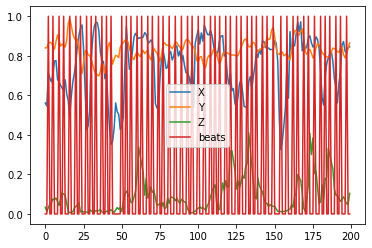

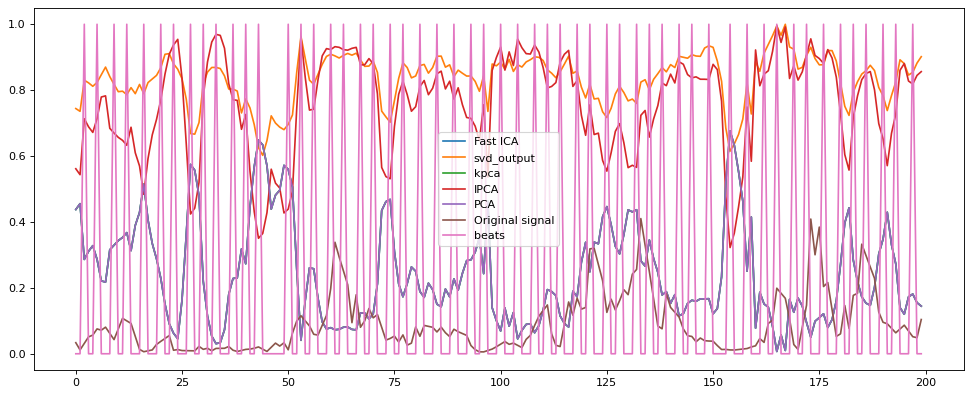

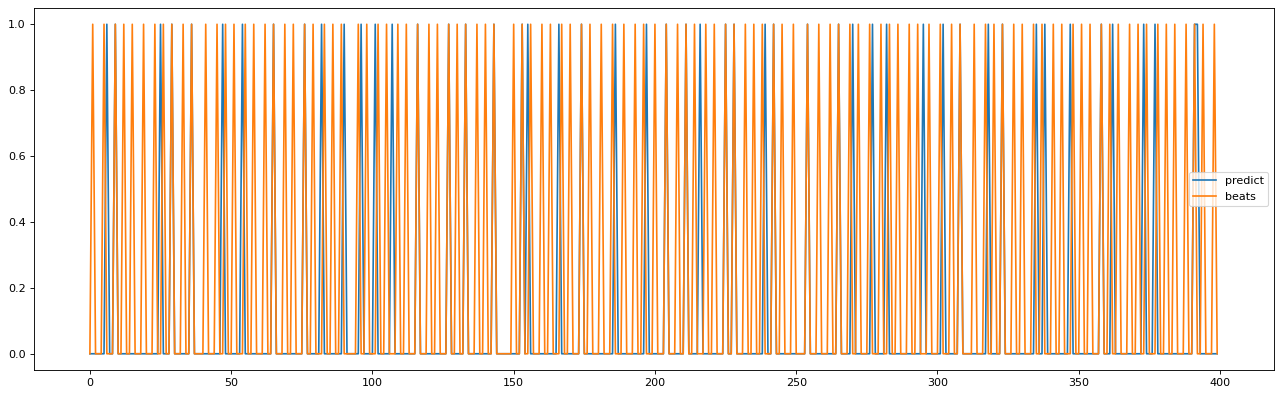

In [15]:
start=200
end=400

X = motiongramCSV[[ 'time','x', 'y', 'qom']]  #inputs
X=np.array(X)

beat= np.array(motiongramCSV.beat)

#Filtering 
from scipy.signal import savgol_filter
x=OkadaFilter(X[:,1])
normalizedx = (x-min(x))/(max(x)-min(x))
y=OkadaFilter(X[:,2])
normalizedy = (y-min(y))/(max(y)-min(y))
z=OkadaFilter(X[:,3])
normalizedz = (z-min(z))/(max(z)-min(z))

orig_time = X[:,0]
time=savgol_filter(X[:,0], 11, 2)
time = (time-min(time))/(max(time)-min(time))


plt.plot(normalizedx[start:end],label="X")
plt.plot(normalizedy[start:end],label="Y")
plt.plot(normalizedz[start:end],label="Z")
plt.plot(beat[start:end],label="beats")
plt.legend()


xx=np.vstack(([normalizedx],[normalizedy],[normalizedz]))
xx= xx.T
print(xx.shape)





svd = TruncatedSVD(n_components=1, n_iter=7, random_state=0)
svd_output = svd.fit_transform(xx)
svd_output = (svd_output-min(svd_output))/(max(svd_output)-min(svd_output))
svd_output=svd_output.T[0]

transformer = KernelPCA(n_components=1, kernel='linear')
kpca = transformer.fit_transform(xx)
kpca = (kpca-min(kpca))/(max(kpca)-min(kpca))
kpca=kpca.T[0]

ipca = IncrementalPCA(n_components=1)
ipca_output=ipca.fit_transform(xx)
ipca_output=(ipca_output-min(ipca_output))/(max(ipca_output)-min(ipca_output))
ipca_output=ipca_output.T[0]

pca = PCA(n_components=1)
out=pca.fit_transform(xx)
pca_output = (out-min(out))/(max(out)-min(out))
pca_output=pca_output.T[0]

transformer = FastICA(n_components=1,random_state=0)
fastica = transformer.fit_transform(xx)
fastica = (fastica-min(fastica))/(max(fastica)-min(fastica))
fastica=fastica.T[0]


from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')

plt.plot(fastica[start:end],label="Fast ICA")
plt.plot(svd_output[start:end],label="svd_output")
plt.plot(kpca[start:end],label="kpca")
plt.plot(ipca_output[start:end],label="IPCA")
plt.plot(pca_output[start:end],label="PCA")
plt.plot(normalizedz[start:end],label="Original signal")
plt.plot(beat[start:end],label="beats")
plt.legend()



l1=findPeaksValleys(kpca)
l2=findPeaksValleys(ipca_output)
l3=findPeaksValleys(svd_output)
l5=findPeaksValleys(pca_output)
l4=findPeaksValleys(fastica)



sig= np.zeros(normalizedx.shape[0])
timesBeatPredicted=[]
for i in range(sig.shape[0]):
    if(np.where(l1 == i)[0]>0):
        sig[i]=sig[i]+1
    if(np.where(l2 == i)[0]>0):
        sig[i]=sig[i]+1
    if(np.where(l3 == i)[0]>0):
        sig[i]=sig[i]+1
    if(np.where(l4 == i)[0]>0):
        sig[i]=sig[i]+1
    if(np.where(l5 == i)[0]>0):
        sig[i]=sig[i]+1
    if(sig[i]<=2):
        sig[i]=0
    else:
        # timesBeatPredicted.append(float(i/10))
        timesBeatPredicted.append(1)
        sig[i]=1


sig = (sig-min(sig))/(max(sig)-min(sig))


start=100
end=500

from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(sig[start:end],label="predict")
plt.plot(beat[start:end],label="beats")
plt.legend()



# **Openpose**

(530, 5)


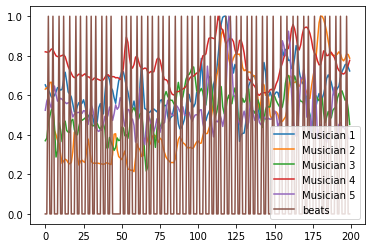

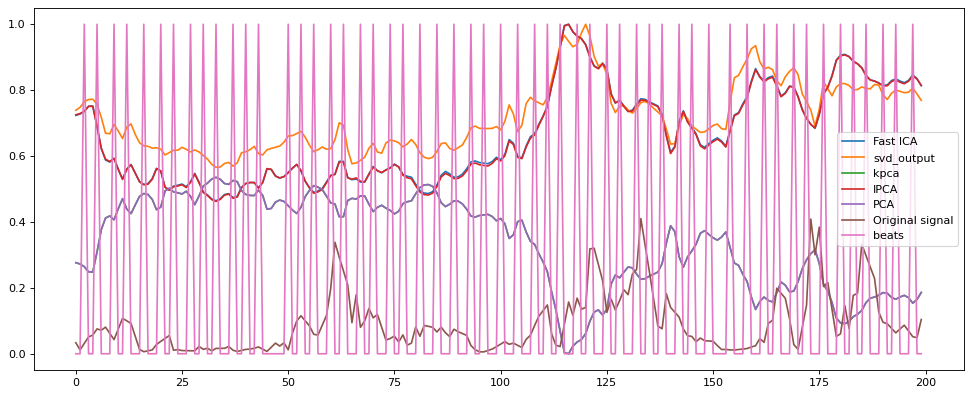

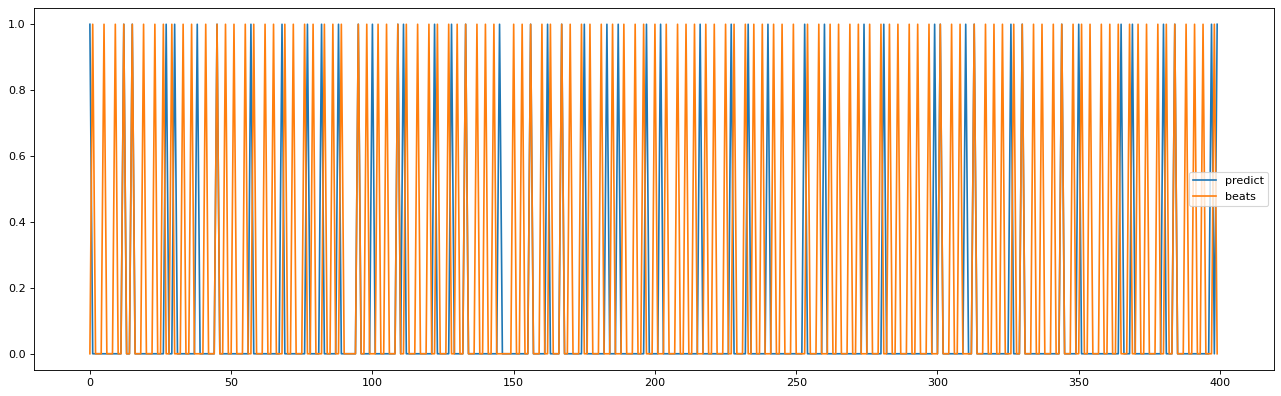

In [16]:
start=200
end=400



if(numberofPerson==2):
    X = openposeCSV[[ 'time','person_1', 'person_2']]  #inputs
    X=np.array(X)

    a=OkadaFilter(X[:,1])
    a = (a-min(a))/(max(a)-min(a))
    b=OkadaFilter(X[:,2])
    b = (b-min(b))/(max(b)-min(b))
    xx=np.vstack(([a],[b]))


    plt.plot(a[start:end],label="Musician 1")
    plt.plot(b[start:end],label="Musician 2")
    plt.plot(beat[start:end],label="beats")
    plt.legend()



if(numberofPerson==3):
    X = openposeCSV[[ 'time','person_1', 'person_2', 'person_3']]  #inputs
    X=np.array(X)

    a=OkadaFilter(X[:,1])
    a = (a-min(a))/(max(a)-min(a))
    b=OkadaFilter(X[:,2])
    b = (b-min(b))/(max(b)-min(b))
    c=OkadaFilter(X[:,3])
    c = (c-min(c))/(max(c)-min(c))
    
    xx=np.vstack(([a],[b],[c]))


    plt.plot(a[start:end],label="Musician 1")
    plt.plot(b[start:end],label="Musician 2")
    plt.plot(c[start:end],label="Musician 3")
    plt.plot(beat[start:end],label="beats")
    plt.legend()


if(numberofPerson==4):
    X = openposeCSV[[ 'time','person_1', 'person_2', 'person_3', 'person_4']]  #inputs
    X=np.array(X)

    a=OkadaFilter(X[:,1])
    a = (a-min(a))/(max(a)-min(a))
    b=OkadaFilter(X[:,2])
    b = (b-min(b))/(max(b)-min(b))
    c=OkadaFilter(X[:,3])
    c = (c-min(c))/(max(c)-min(c))
    d=OkadaFilter(X[:,4])
    d = (d-min(d))/(max(d)-min(d))

    xx=np.vstack(([a],[b],[c],[d]))


    plt.plot(a[start:end],label="Musician 1")
    plt.plot(b[start:end],label="Musician 2")
    plt.plot(c[start:end],label="Musician 3")
    plt.plot(d[start:end],label="Musician 4")
    plt.plot(beat[start:end],label="beats")
    plt.legend()



if(numberofPerson==5):
    X = openposeCSV[[ 'time','person_1', 'person_2', 'person_3', 'person_4','person_5']]  #inputs
    X=np.array(X)

    a=OkadaFilter(X[:,1])
    a = (a-min(a))/(max(a)-min(a))
    b=OkadaFilter(X[:,2])
    b = (b-min(b))/(max(b)-min(b))
    c=OkadaFilter(X[:,3])
    c = (c-min(c))/(max(c)-min(c))
    d=OkadaFilter(X[:,4])
    d = (d-min(d))/(max(d)-min(d))
    e=OkadaFilter(X[:,5])
    e = (e-min(e))/(max(e)-min(e))

    xx=np.vstack(([a],[b],[c],[d],[e]))


    plt.plot(a[start:end],label="Musician 1")
    plt.plot(b[start:end],label="Musician 2")
    plt.plot(c[start:end],label="Musician 3")
    plt.plot(d[start:end],label="Musician 4")
    plt.plot(e[start:end],label="Musician 5")
    plt.plot(beat[start:end],label="beats")
    plt.legend()




beat= np.array(openposeCSV.beat)

xx= xx.T
print(xx.shape)





svd = TruncatedSVD(n_components=1, n_iter=7, random_state=0)
svd_output = svd.fit_transform(xx)
svd_output = (svd_output-min(svd_output))/(max(svd_output)-min(svd_output))
svd_output=svd_output.T[0]

transformer = KernelPCA(n_components=1, kernel='linear')
kpca = transformer.fit_transform(xx)
kpca = (kpca-min(kpca))/(max(kpca)-min(kpca))
kpca=kpca.T[0]

ipca = IncrementalPCA(n_components=1)
ipca_output=ipca.fit_transform(xx)
ipca_output=(ipca_output-min(ipca_output))/(max(ipca_output)-min(ipca_output))
ipca_output=ipca_output.T[0]

pca = PCA(n_components=1)
out=pca.fit_transform(xx)
pca_output = (out-min(out))/(max(out)-min(out))
pca_output=pca_output.T[0]

transformer = FastICA(n_components=1,random_state=0)
fastica = transformer.fit_transform(xx)
fastica = (fastica-min(fastica))/(max(fastica)-min(fastica))
fastica=fastica.T[0]


from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')

plt.plot(fastica[start:end],label="Fast ICA")
plt.plot(svd_output[start:end],label="svd_output")
plt.plot(kpca[start:end],label="kpca")
plt.plot(ipca_output[start:end],label="IPCA")
plt.plot(pca_output[start:end],label="PCA")
plt.plot(normalizedz[start:end],label="Original signal")
plt.plot(beat[start:end],label="beats")
plt.legend()



l1=findPeaksValleys(kpca)
l2=findPeaksValleys(ipca_output)
l3=findPeaksValleys(svd_output)
l5=findPeaksValleys(pca_output)
l4=findPeaksValleys(fastica)



sig2= np.zeros(a.shape[0])
timesBeatPredicted=[]
for i in range(sig2.shape[0]):
    if(np.where(l1 == i)[0]>0):
        sig2[i]=sig2[i]+1
    if(np.where(l2 == i)[0]>0):
        sig2[i]=sig2[i]+1
    if(np.where(l3 == i)[0]>0):
        sig2[i]=sig2[i]+1
    if(np.where(l4 == i)[0]>0):
        sig2[i]=sig2[i]+1
    if(np.where(l5 == i)[0]>0):
        sig2[i]=sig2[i]+1
    if(sig2[i]<=2):
        sig2[i]=0
    else:
        # timesBeatPredicted.append(float(i/10))
        timesBeatPredicted.append(1)
        sig2[i]=1


sig2 = (sig2-min(sig2))/(max(sig2)-min(sig2))


start=100
end=500

from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(sig2[start:end],label="predict")
plt.plot(beat[start:end],label="beats")
plt.legend()



# **Openflow**

(530, 5)


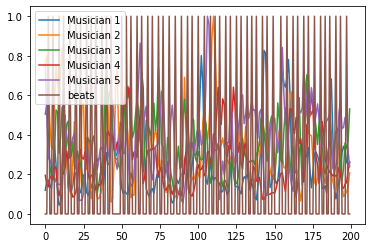

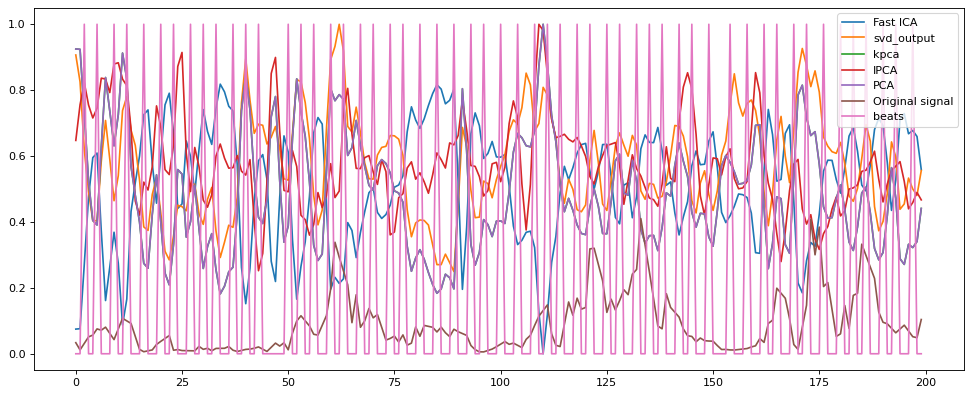

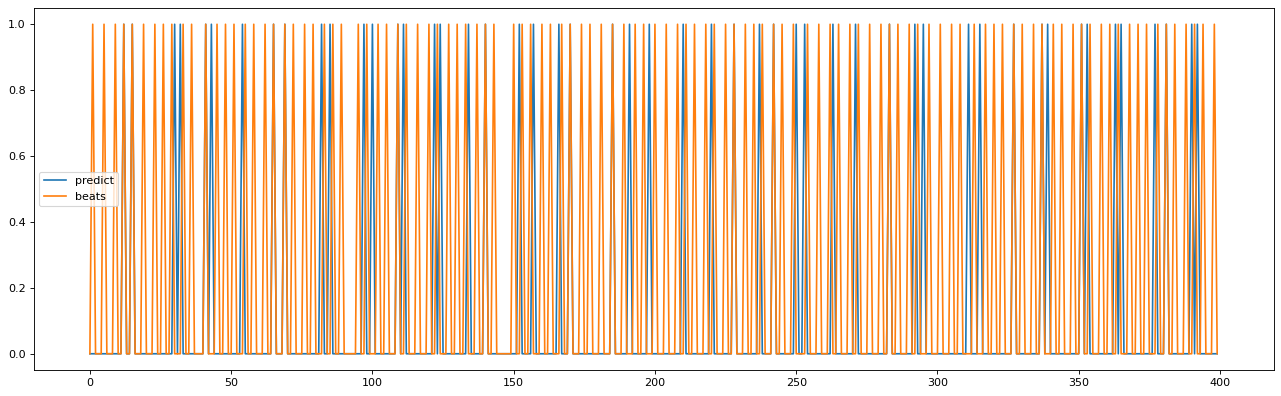

In [17]:
start=200
end=400



if(numberofPerson==2):
    X = openFlowCSV[[ 'time','person_1', 'person_2']]  #inputs
    X=np.array(X)

    a=OkadaFilter(X[:,1])
    a = (a-min(a))/(max(a)-min(a))
    b=OkadaFilter(X[:,2])
    b = (b-min(b))/(max(b)-min(b))
    xx=np.vstack(([a],[b]))


    plt.plot(a[start:end],label="Musician 1")
    plt.plot(b[start:end],label="Musician 2")
    plt.plot(beat[start:end],label="beats")
    plt.legend()



if(numberofPerson==3):
    X = openFlowCSV[[ 'time','person_1', 'person_2', 'person_3']]  #inputs
    X=np.array(X)

    a=OkadaFilter(X[:,1])
    a = (a-min(a))/(max(a)-min(a))
    b=OkadaFilter(X[:,2])
    b = (b-min(b))/(max(b)-min(b))
    c=OkadaFilter(X[:,3])
    c = (c-min(c))/(max(c)-min(c))
    
    xx=np.vstack(([a],[b],[c]))


    plt.plot(a[start:end],label="Musician 1")
    plt.plot(b[start:end],label="Musician 2")
    plt.plot(c[start:end],label="Musician 3")
    plt.plot(beat[start:end],label="beats")
    plt.legend()


if(numberofPerson==4):
    X = openFlowCSV[[ 'time','person_1', 'person_2', 'person_3', 'person_4']]  #inputs
    X=np.array(X)

    a=OkadaFilter(X[:,1])
    a = (a-min(a))/(max(a)-min(a))
    b=OkadaFilter(X[:,2])
    b = (b-min(b))/(max(b)-min(b))
    c=OkadaFilter(X[:,3])
    c = (c-min(c))/(max(c)-min(c))
    d=OkadaFilter(X[:,4])
    d = (d-min(d))/(max(d)-min(d))

    xx=np.vstack(([a],[b],[c],[d]))


    plt.plot(a[start:end],label="Musician 1")
    plt.plot(b[start:end],label="Musician 2")
    plt.plot(c[start:end],label="Musician 3")
    plt.plot(d[start:end],label="Musician 4")
    plt.plot(beat[start:end],label="beats")
    plt.legend()



if(numberofPerson==5):
    X = openFlowCSV[[ 'time','person_1', 'person_2', 'person_3', 'person_4','person_5']]  #inputs
    X=np.array(X)

    a=OkadaFilter(X[:,1])
    a = (a-min(a))/(max(a)-min(a))
    b=OkadaFilter(X[:,2])
    b = (b-min(b))/(max(b)-min(b))
    c=OkadaFilter(X[:,3])
    c = (c-min(c))/(max(c)-min(c))
    d=OkadaFilter(X[:,4])
    d = (d-min(d))/(max(d)-min(d))
    e=OkadaFilter(X[:,5])
    e = (e-min(e))/(max(e)-min(e))

    xx=np.vstack(([a],[b],[c],[d],[e]))


    plt.plot(a[start:end],label="Musician 1")
    plt.plot(b[start:end],label="Musician 2")
    plt.plot(c[start:end],label="Musician 3")
    plt.plot(d[start:end],label="Musician 4")
    plt.plot(e[start:end],label="Musician 5")
    plt.plot(beat[start:end],label="beats")
    plt.legend()




beat= np.array(openFlowCSV.beat)

xx= xx.T
print(xx.shape)





svd = TruncatedSVD(n_components=1, n_iter=7, random_state=0)
svd_output = svd.fit_transform(xx)
svd_output = (svd_output-min(svd_output))/(max(svd_output)-min(svd_output))
svd_output=svd_output.T[0]

transformer = KernelPCA(n_components=1, kernel='linear')
kpca = transformer.fit_transform(xx)
kpca = (kpca-min(kpca))/(max(kpca)-min(kpca))
kpca=kpca.T[0]

ipca = IncrementalPCA(n_components=1)
ipca_output=ipca.fit_transform(xx)
ipca_output=(ipca_output-min(ipca_output))/(max(ipca_output)-min(ipca_output))
ipca_output=ipca_output.T[0]

pca = PCA(n_components=1)
out=pca.fit_transform(xx)
pca_output = (out-min(out))/(max(out)-min(out))
pca_output=pca_output.T[0]

transformer = FastICA(n_components=1,random_state=0)
fastica = transformer.fit_transform(xx)
fastica = (fastica-min(fastica))/(max(fastica)-min(fastica))
fastica=fastica.T[0]


from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')

plt.plot(fastica[start:end],label="Fast ICA")
plt.plot(svd_output[start:end],label="svd_output")
plt.plot(kpca[start:end],label="kpca")
plt.plot(ipca_output[start:end],label="IPCA")
plt.plot(pca_output[start:end],label="PCA")
plt.plot(normalizedz[start:end],label="Original signal")
plt.plot(beat[start:end],label="beats")
plt.legend()



l1=findPeaksValleys(kpca)
l2=findPeaksValleys(ipca_output)
l3=findPeaksValleys(svd_output)
l5=findPeaksValleys(pca_output)
l4=findPeaksValleys(fastica)



sig3= np.zeros(a.shape[0])
timesBeatPredicted=[]
for i in range(sig3.shape[0]):
    if(np.where(l1 == i)[0]>0):
        sig3[i]=sig3[i]+1
    if(np.where(l2 == i)[0]>0):
        sig3[i]=sig3[i]+1
    if(np.where(l3 == i)[0]>0):
        sig3[i]=sig3[i]+1
    if(np.where(l4 == i)[0]>0):
        sig3[i]=sig3[i]+1
    if(np.where(l5 == i)[0]>0):
        sig3[i]=sig3[i]+1
    if(sig3[i]<=2):
        sig3[i]=0
    else:
        # timesBeatPredicted.append(float(i/10))
        timesBeatPredicted.append(1)
        sig3[i]=1


sig3 = (sig3-min(sig3))/(max(sig3)-min(sig3))


start=100
end=500

from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(sig3[start:end],label="predict")
plt.plot(beat[start:end],label="beats")
plt.legend()



# **Comparision in Performance**

In [18]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')

mo=[]
for i in range(len(beat)):
    if(sig[i]==1):
        mo.append(i)


op=[]
for i in range(len(beat)):
    if(sig2[i]==1):
        op.append(i)


of=[]
for i in range(len(beat)):
    if(sig3[i]==1):
        of.append(i)



be=[]
for i in range(len(beat)):
    if(beat[i]==1):
        be.append(i)




<Figure size 1200x480 with 0 Axes>

In [19]:
# len(op),len(be)
# op,be

In [20]:
mo=[float(i)/10.0 for i in mo]
op=[float(i)/10.0 for i in op]
of=[float(i)/10.0 for i in of]
be=[float(i)/10.0 for i in be]


In [21]:
l=max(max(mo),max(op),max(of),max(be))



In [22]:
def common_member(a, b): 
    a_set = set(a) 
    b_set = set(b) 
  
    # if (a_set & b_set): 
    #     print(a_set & b_set) 
    # else: 
    #     print("No common elements")
    return(a_set & b_set)

# print(len(common_member(mo,be)))
# print(len(common_member(np.array(mo)+0.1,be))+len(common_member(np.array(mo)-0.1,be)))

print("Motiongram")
motionExact=(len(common_member(mo,be)))
motionOne=(len(common_member(np.array(mo)+0.1,be))+len(common_member(np.array(mo)-0.1,be)))




print("Pose Estimation")
PoseExact=(len(common_member(op,be)))
PoseOne=(len(common_member(np.array(op)+0.1,be))+len(common_member(np.array(op)-0.1,be)))



print("Pose Estimation with optical")
OpticalFlowExact=(len(common_member(of,be)))
OpticalFlowOne=(len(common_member(np.array(of)+0.1,be))+len(common_member(np.array(of)-0.1,be)))


 

Motiongram
Pose Estimation
Pose Estimation with optical


In [23]:
# import csv   
# files=[file,motionExact,motionOne,PoseExact,PoseOne,numberofPerson]
# with open(r'output.csv', 'a') as f:
#     writer = csv.writer(files)
#     writer.writerow(fields)

duration=max(pd.read_csv(filepath1).shape[0],pd.read_csv(filepath2).shape[0])/10

import pandas as pd
df=pd.DataFrame([file,motionExact,motionOne,PoseExact,PoseOne,OpticalFlowExact,OpticalFlowOne,numberofPerson,duration])
df=df.T
print(df)
df.to_csv('output.csv', mode='a', header=False)

    0   1   2   3   4   5   6  7     8
0  43  27  21  16  19  20  23  5  55.3


In [24]:
import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_csv('output.csv')


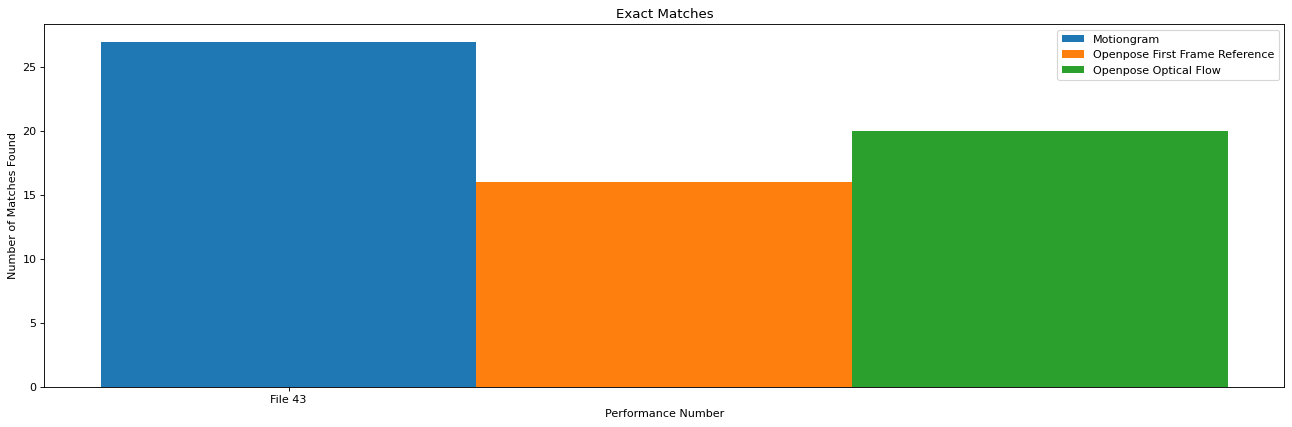

In [25]:
import numpy as np

w=0.2

x=["File "+ str(s)  for s in data.filename]

# x=  data.filename
b=data.motionExact
g=data.PoseExact
k=data.OpticalFlowExact

bar1=np.arange(len(x))
bar2=[i+w for i in bar1]
bar3=[i+w+w for i in bar1]

from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
plt.bar(bar1,b,w,label="Motiongram")
plt.bar(bar2,g,w,label="Openpose First Frame Reference")
plt.bar(bar3,k,w,label="Openpose Optical Flow")

plt.xticks(bar1,x)
plt.title("Exact Matches")
plt.xlabel('Performance Number')
plt.ylabel('Number of Matches Found')
plt.legend()
# data

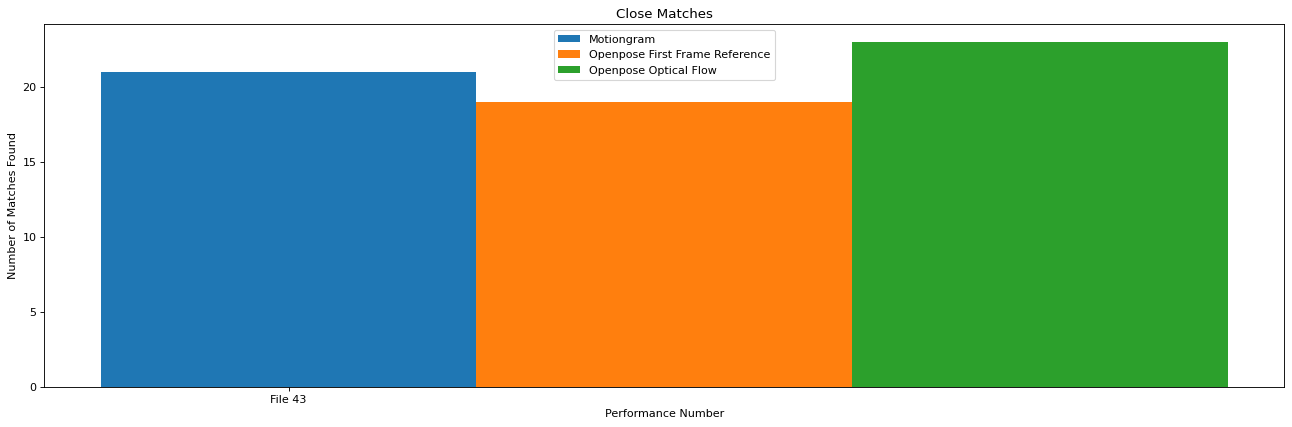

In [26]:
import numpy as np

w=0.2

x=["File "+ str(s)  for s in data.filename]

# x=  data.filename
b=data.motionOne
g=data.PoseOne
k=data.OpticalFlowOne

bar1=np.arange(len(x))
bar2=[i+w for i in bar1]
bar3=[i+w+w for i in bar1]

from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
plt.bar(bar1,b,w,label="Motiongram")
plt.bar(bar2,g,w,label="Openpose First Frame Reference")
plt.bar(bar3,k,w,label="Openpose Optical Flow")

plt.xticks(bar1,x)
plt.title("Close Matches")
plt.xlabel('Performance Number')
plt.ylabel('Number of Matches Found')
plt.legend()
# data